<a href="https://colab.research.google.com/github/jessamcs/Week-9-Unsupervised-Learning/blob/main/PCA_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PCA Exercise**

In [1]:
#Load the dataset
from sklearn.datasets import fetch_openml
mnist = fetch_openml ('mnist_784')
mnist.data.shape

(70000, 784)

In [2]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

In [3]:
from keras.datasets import mnist
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape data
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)


In [4]:
#Train X axis
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [5]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(X_train)

In [6]:
# Instantiate then data using PCA
pca = PCA()
pca.fit(scaled_df)

PCA()

Text(0, 0.5, 'Proportion of Explained Variance')

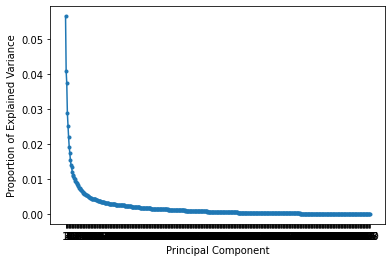

In [7]:
# Plot the explained variance ratios of the first 10 principal components
plt.plot(range(1, 500), pca.explained_variance_ratio_[:499], marker = '.')
plt.xticks(ticks = range(1, 500))
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Explained Variance')


In [9]:
# Train test split
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [11]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)



In [12]:
# fit PCA
pca = PCA(n_components = 3)
X_train_pca = pca.fit_transform(X_train_sc)
X_test_pca = pca.transform(X_test_sc)
# fit logistic regression
logreg = LogisticRegression()
logreg.fit(X_train_pca, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [16]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [19]:
# Lets train our model on training data and predict also on training to see results
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_train)
r2 = r2_score(y_train,y_pred)
print('R-Squared Score is : {}'.format(r2))

R-Squared Score is : 0.6160666339166287


In [21]:
# Testing
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
r2 = r2_score(y_test,y_pred)
print('R2 Score is : {}'.format(r2))

R2 Score is : -5452525097049642.0
